In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
#read json training file and convert it into data frame
#file = 'training-and-test/training.json'
def read_data(path):
    column = ['English','Physics','Chemistry','Mathematics','Computer Science','Physical Education',
             'Economics','Biology','Accountancy','Business Studies']
    data = None
    with open(path) as train_file:
        lines = train_file.readlines()
        json_obj = [json.loads(line) for line in lines[1:]]
        data = pd.DataFrame(json_obj)
    return data

In [3]:
training_data = read_data('training-and-test/training.json')

In [4]:
print(training_data.shape)
training_data.head()

(79465, 11)


,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,8.0,7.0,3.0,4,6,195490,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,3,3,190869,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,2.0,1,2,3111,NaN,NaN,NaN,NaN,NaN
3,8.0,7.0,6.0,7,7,47738,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,3,2,85520,NaN,NaN,NaN,NaN,NaN


In [5]:
training_data.count()

Physics              65750
Chemistry            65817
PhysicalEducation    32403
English              79465
Mathematics          79465
serial               79465
Biology              14853
Accountancy          13561
BusinessStudies      13459
Economics            14032
ComputerScience      18520
dtype: int64

In [6]:
 training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79465 entries, 0 to 79464
Data columns (total 11 columns):
Physics              65750 non-null float64
Chemistry            65817 non-null float64
PhysicalEducation    32403 non-null float64
English              79465 non-null int64
Mathematics          79465 non-null int64
serial               79465 non-null int64
Biology              14853 non-null float64
Accountancy          13561 non-null float64
BusinessStudies      13459 non-null float64
Economics            14032 non-null float64
ComputerScience      18520 non-null float64
dtypes: float64(8), int64(3)
memory usage: 6.7 MB


In [7]:
training_data.describe()

,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
count,65750.000000,65817.000000,32403.000000,79465.000000,79465.000000,79465.000000,14853.000000,13561.000000,13459.000000,14032.000000,18520.000000
mean,3.992593,3.983971,3.186032,3.072044,4.247858,111242.377638,3.599004,2.613672,2.893751,2.469142,3.876350
std,2.213173,2.165750,1.912542,1.796456,2.357411,64406.827932,2.071209,1.748936,1.952590,1.727387,2.150361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,55404.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,4.000000,111250.000000,3.000000,2.000000,2.000000,2.000000,4.000000
75%,6.000000,6.000000,4.000000,4.000000,6.000000,167014.000000,5.000000,4.000000,4.000000,3.000000,6.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,222844.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [8]:
training_data = training_data.sample(frac=1).reset_index(drop=True)

In [9]:
training_data

,Physics,Chemistry,PhysicalEducation,English,Mathematics,serial,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,NaN,NaN,NaN,5,6,162725,NaN,2.0,5.0,5.0,NaN
1,4.0,5.0,NaN,4,8,126870,3.0,NaN,NaN,NaN,NaN
2,8.0,7.0,4.0,2,4,71674,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,6,7,130523,NaN,3.0,3.0,4.0,NaN
4,3.0,2.0,NaN,4,4,25737,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...
79460,4.0,3.0,3.0,2,2,63318,NaN,NaN,NaN,NaN,NaN
79461,8.0,6.0,3.0,2,6,106994,NaN,NaN,NaN,NaN,NaN
79462,7.0,7.0,2.0,4,6,177685,NaN,NaN,NaN,NaN,NaN
79463,1.0,1.0,NaN,5,1,176382,NaN,NaN,NaN,NaN,5.0


In [10]:
training_data['Mathematics'].isna().sum()
training_data.fillna(0,inplace=True)

In [11]:
training_data['Physics'].isna().sum()

0

In [12]:
target = training_data['Mathematics']

In [13]:
target = pd.DataFrame(target)
target.head()

,Mathematics
0,6
1,8
2,4
3,7
4,4


In [14]:
#Drop mathematics and Serial no column from training_data
training_data.drop(['Mathematics','serial'],axis=1,inplace=True)

In [15]:
training_data.head()

,Physics,Chemistry,PhysicalEducation,English,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
0,0.0,0.0,0.0,5,0.0,2.0,5.0,5.0,0.0
1,4.0,5.0,0.0,4,3.0,0.0,0.0,0.0,0.0
2,8.0,7.0,4.0,2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,6,0.0,3.0,3.0,4.0,0.0
4,3.0,2.0,0.0,4,0.0,0.0,0.0,0.0,3.0


In [16]:
import seaborn as sns

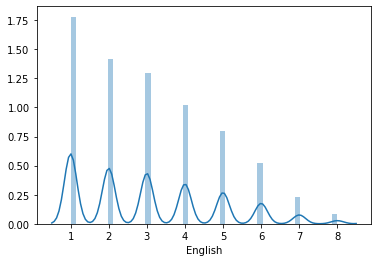

In [17]:
sns.distplot(training_data['English'])

In [18]:
training_data.corr()

,Physics,Chemistry,PhysicalEducation,English,Biology,Accountancy,BusinessStudies,Economics,ComputerScience
Physics,1.000000,0.840691,0.400833,0.390902,0.186064,-0.479600,-0.476254,-0.451116,0.197819
Chemistry,0.840691,1.000000,0.387115,0.354040,0.190633,-0.486363,-0.482962,-0.456656,0.222957
PhysicalEducation,0.400833,0.387115,1.000000,0.365254,-0.252049,-0.187988,-0.195950,-0.220906,-0.286875
English,0.390902,0.354040,0.365254,1.000000,-0.019773,0.085361,0.104091,0.069370,0.033610
Biology,0.186064,0.190633,-0.252049,-0.019773,1.000000,-0.147743,-0.146680,-0.148227,-0.187716
Accountancy,-0.479600,-0.486363,-0.187988,0.085361,-0.147743,1.000000,0.861650,0.823781,-0.166332
BusinessStudies,-0.476254,-0.482962,-0.195950,0.104091,-0.146680,0.861650,1.000000,0.800056,-0.165306
Economics,-0.451116,-0.456656,-0.220906,0.069370,-0.148227,0.823781,0.800056,1.000000,-0.169788
ComputerScience,0.197819,0.222957,-0.286875,0.033610,-0.187716,-0.166332,-0.165306,-0.169788,1.000000


In [19]:
corr_math =[(subject, target['Mathematics'].corr(training_data[subject])) for subject in training_data.columns]

In [20]:
corr_math

[('Physics', 0.5008527783268542),
 ('Chemistry', 0.5014673449062093),
 ('PhysicalEducation', 0.2292364533966181),
 ('English', 0.4273422657146751),
 ('Biology', 0.12889957917003297),
 ('Accountancy', 0.18987758564311702),
 ('BusinessStudies', 0.16755941995892568),
 ('Economics', 0.16283735363839463),
 ('ComputerScience', 0.09736686731730629)]

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression()

In [23]:
clf.fit(training_data[['Chemistry','ComputerScience','BusinessStudies']],target['Mathematics'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
clf.score(training_data[['Physics','Chemistry','BusinessStudies']],target['Mathematics'])

0.30340401434593844

In [25]:
#clf.predict('training-and-test/sample-test.in.json')


In [26]:
def read_data(path):
    column = ['Physics','Chemistry','Business Studies']
    data = None
    with open(path) as train_file:
        lines = train_file.readlines()
        json_obj = [json.loads(line) for line in lines[1:]]
        test = pd.DataFrame(json_obj)
    return test

In [27]:
test_df = read_data('training-and-test/sample-test.in.json')
test_df.head()

,Physics,Chemistry,Biology,English,serial,ComputerScience,Accountancy,BusinessStudies,Economics,PhysicalEducation
0,2.0,2.0,1.0,1,221375,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,NaN,4,150188,4.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1,12154,NaN,1.0,1.0,3.0,NaN
3,2.0,2.0,NaN,1,31442,2.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2,137253,NaN,5.0,4.0,3.0,NaN


In [28]:
test_df.fillna(0,inplace=True)

In [29]:
test_df.head()

,Physics,Chemistry,Biology,English,serial,ComputerScience,Accountancy,BusinessStudies,Economics,PhysicalEducation
0,2.0,2.0,1.0,1,221375,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,0.0,4,150188,4.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1,12154,0.0,1.0,1.0,3.0,0.0
3,2.0,2.0,0.0,1,31442,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2,137253,0.0,5.0,4.0,3.0,0.0


In [30]:
clf.predict(test_df[['Physics','ComputerScience','BusinessStudies']]).tolist()

[1,
 2,
 1,
 1,
 8,
 2,
 8,
 3,
 2,
 2,
 1,
 1,
 1,
 3,
 4,
 5,
 8,
 1,
 8,
 8,
 5,
 2,
 2,
 2,
 5,
 1,
 1,
 2,
 8,
 2,
 2,
 3,
 2,
 3,
 5,
 8,
 1,
 5,
 8,
 2,
 3,
 2,
 5,
 4,
 2,
 5,
 8,
 3,
 1,
 1,
 8,
 1,
 8,
 4,
 8,
 1,
 1,
 8,
 1,
 3,
 2,
 8,
 3,
 3,
 8,
 2,
 2,
 4,
 8,
 4,
 1,
 8,
 8,
 1,
 8,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 5,
 1,
 1,
 3,
 1,
 3,
 8,
 1,
 4,
 2,
 8,
 1,
 8,
 5,
 1,
 1,
 3,
 8,
 8,
 5,
 5,
 8,
 5,
 8,
 1,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 3,
 8,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 3,
 8,
 8,
 1,
 8,
 2,
 1,
 5,
 2,
 1,
 3,
 8,
 3,
 8,
 5,
 2,
 3,
 3,
 5,
 1,
 1,
 3,
 8,
 3,
 5,
 1,
 1,
 8,
 3,
 1,
 1,
 1,
 5,
 8,
 3,
 8,
 1,
 1,
 8,
 1,
 2,
 5,
 1,
 3,
 3,
 5,
 1,
 8,
 1,
 8,
 8,
 2,
 2,
 8,
 1,
 8,
 5,
 3,
 2,
 8,
 5,
 3,
 5,
 4,
 1,
 3,
 1,
 8,
 1,
 1,
 1,
 5,
 2,
 8,
 3,
 2,
 2,
 8,
 1,
 8,
 2,
 8,
 2,
 2,
 8,
 3,
 2,
 1,
 2,
 1,
 1,
 8,
 1,
 1,
 2,
 2,
 2,
 2,
 8,
 5,
 2,
 2,
 1,
 5,
 2,
 3,
 8,
 8,
 2,
 8,
 8,
 1,
 5,
 2,
 3,
 2,
 8,
 5,
 1,
 8,
 5,
 8,


# testing

In [31]:
X = training_data
y = target

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=103)

In [38]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [39]:
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
clf.score(x_train,y_train)
clf.score(x_test,y_test)

0.5775481960908133

In [40]:
print(clf.intercept_)

[0.68613889]


In [41]:
print(clf.coef_)

[[0.36083342 0.38509992 0.10605908 0.05447522 0.1681557  0.66433427
  0.30759602 0.29967952 0.10822419]]


In [45]:
cdf = pd.DataFrame(clf.coef_.reshape(-1,1),x_train.columns,columns=['Coeff'])

In [46]:
cdf

,Coeff
Physics,0.360833
Chemistry,0.385100
PhysicalEducation,0.106059
English,0.054475
Biology,0.168156
Accountancy,0.664334
BusinessStudies,0.307596
Economics,0.299680
ComputerScience,0.108224


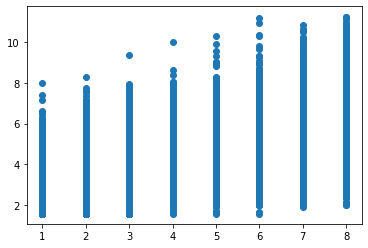

In [49]:
plt.scatter(y_test,clf.predict(x_test))

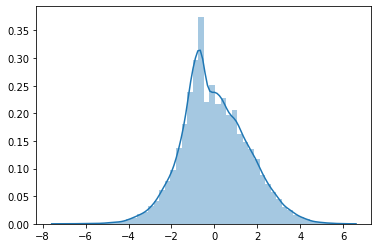

In [59]:
sns.distplot((y_test-clf.predict(x_test)))

In [70]:
from sklearn import metrics


In [73]:
metrics.mean_absolute_error(y_test,clf.predict(x_test))

1.2191739799549413

In [74]:
metrics.mean_squared_error(y_test,clf.predict(x_test))

2.345674985214959